In [205]:
nb_snsps = 100
phenotypes = None

# phenotypes = ['BMD_1_100']

In [206]:
import math
import pandas as pd

if phenotypes is None:
    # That means all
    import glob

    csvs_ge = glob.glob('out/ge_*.csv')
    csvs_lm = glob.glob('out/lm_*.csv')
    
    names_ge = [x[7:].split(".")[0] for x in csvs_ge]
    names_lm = [x[7:].split(".")[0] for x in csvs_lm]
    phenotypes = set(names_ge).intersection(names_lm)

In [207]:
best_pheno_snp = pd.DataFrame(columns=('pheno', 'p'))

for i,p in enumerate(phenotypes):
    ge_snps = pd.read_csv(f"out/ge_{p}.csv", nrows=3)
    best_pheno_snp.loc[i] = [p, ge_snps['p'][0]]

best_pheno_snp = best_pheno_snp.sort_values(by=['p'])
print("Best variant and it's pvalue for each phenotype")
pd.set_option('display.max_rows', None)
display(best_pheno_snp)
pd.set_option('display.max_rows', 60)

Best variant and it's pvalue for each phenotype


,pheno,p
10,testisweight_1_79646,4.521024e-18
19,abBMD_1_79646,1.110221e-14
27,tibia_1_79646,1.843551e-08
0,D1TOTDIST10_1_79646,5.792651e-08
37,D1ctrtime0to30_1_79646,6.901068e-08
4,D2TOTDIST25_1_79646,7.173318e-08
7,soleus_1_79646,8.342285e-08
2,D2hact0to15_1_79646,1.678204e-07
42,D2ctrtime0to15_1_79646,1.861225e-07
34,D3TOTDIST15_1_79646,3.161540e-07


In [212]:
# We look only at phenotypes that give a pvalue larger than 1e-8
display(best_pheno_snp[best_pheno_snp['p']<1e-7])
phenotypes = list(best_pheno_snp[best_pheno_snp['p']<1e-7]['pheno'])

,pheno,p
10,testisweight_1_79646,4.521024e-18
19,abBMD_1_79646,1.110221e-14
27,tibia_1_79646,1.843551e-08
0,D1TOTDIST10_1_79646,5.792651e-08
37,D1ctrtime0to30_1_79646,6.901068e-08
4,D2TOTDIST25_1_79646,7.173318e-08
7,soleus_1_79646,8.342285e-08


In [213]:
# Find the closest results between ge (gemma) and lm (linear model)
diff_phenos = pd.DataFrame(columns=('pheno', 'diff'))

for i,p in enumerate(phenotypes):
    ge_snps = pd.read_csv(f"out/ge_{p}.csv", nrows=nb_snsps)
    lm_snps = pd.read_csv(f"out/lm_{p}.csv", nrows=nb_snsps)
    
    # Compute how far the SNP-s in gemma (best result) are from the ones in lm 
    total_diffs = 0
    for idx,row in ge_snps.iterrows():
        lookup_snp = lm_snps[lm_snps['snp']==row['snp']]
        if lookup_snp.shape[0] > 0:
            total_diffs += abs(lookup_snp.iloc[0,0]-row[0])
        else:
            total_diffs += nb_snsps
    diff_phenos.loc[i] = [p, total_diffs]

In [214]:
pd.set_option('display.max_rows', None)
print(diff_phenos.sort_values(by=['diff']))
pd.set_option('display.max_rows', 60)

                    pheno  diff
1           abBMD_1_79646   911
6          soleus_1_79646   968
4  D1ctrtime0to30_1_79646  1037
2           tibia_1_79646  2835
0    testisweight_1_79646  3228
5     D2TOTDIST25_1_79646  3672
3     D1TOTDIST10_1_79646  4768


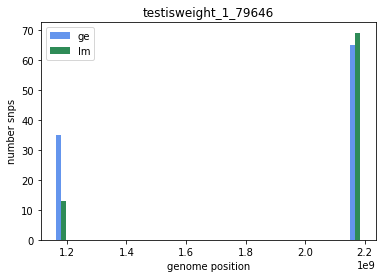

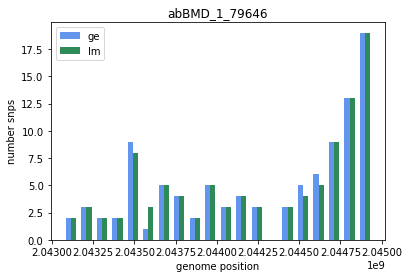

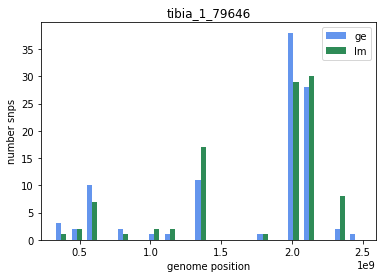

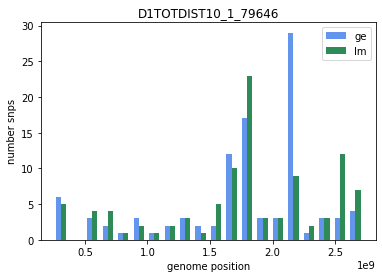

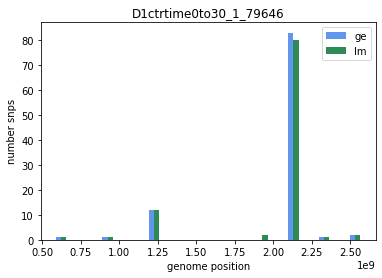

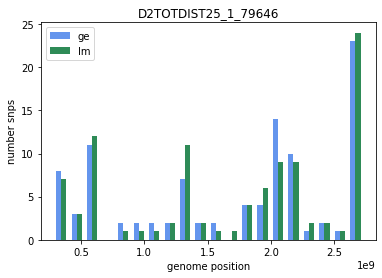

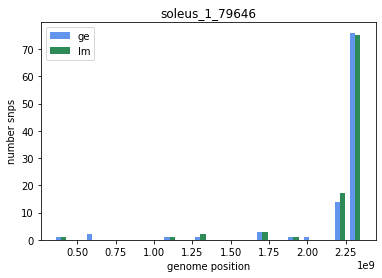

In [218]:
import numpy as np
import matplotlib.pyplot as plt

# Display the distribution of the most probable SNP-s per genome location
diff_phenos = pd.DataFrame(columns=('pheno', 'diff'))

chrs_lengths = [247249719.00,242951149.00,199501827.00,191273063.00,180857866.00,170899992.00,158821424.00,146274826.00,140273252.00,
                135374737.00,134452384.00,132349534.00,114142980.00,106368585.00,100338915.00,88827254.00,78774742.00,76117153.00,63811651.00]
abs_pos = [0] + [sum(chrs_lengths[0:i]) for i in range(1,20)]

for i,p in enumerate(phenotypes):
    ge_snps = pd.read_csv(f"out/ge_{p}.csv", nrows=nb_snsps)
    lm_snps = pd.read_csv(f"out/lm_{p}.csv", nrows=nb_snsps)
    
    # We adjust positions to be absolute
    lm_snps_abs = lm_snps.apply(lambda row: row['pos'] + abs_pos[row['chr']], axis=1)
    ge_snps_abs = ge_snps.apply(lambda row: row['pos'] + abs_pos[row['chr']], axis=1)

    fig, ax = plt.subplots()

    a_heights, a_bins = np.histogram(lm_snps_abs, bins=20)
    b_heights, b_bins = np.histogram(ge_snps_abs, bins=a_bins)

    width = (a_bins[1] - a_bins[0])/3

    ax.bar(a_bins[:-1], a_heights, width=width, facecolor='cornflowerblue',label='ge')
    ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen',label='lm')
    ax.legend()
    ax.set_xlabel('genome position')
    ax.set_ylabel('number snps')
    plt.title(p)

In [216]:
display(ge_snps)

,Unnamed: 0,chr,pos,log10p,snp,p
0,1,13,113859598,7.078715,rs30535702,8.342285e-08
1,2,13,114170966,6.792659,rs222759307,1.611912e-07
2,3,5,67675886,6.740378,cfw-5-67675886,1.818116e-07
3,4,13,112989997,6.534915,rs108106346,2.918000e-07
4,5,13,113611365,6.274347,rs47870536,5.316831e-07
...,...,...,...,...,...,...
95,96,13,9689084,4.389747,rs45880155,4.076175e-05
96,97,13,9271219,4.388370,rs46668932,4.089124e-05
97,98,13,9266074,4.381706,rs234246831,4.152346e-05
98,99,13,114350559,4.372380,rs48974653,4.242482e-05
